# Predictive Maintenance Using Long Short-Term Memory (LSTM) Networks

In [1]:
import pandas as pd
import numpy as np

## Load, Clean and tokenized dataset

#### In the first step, we cleaned and tokenized dataset.

In [2]:
# Load the dataset
data = pd.read_csv (r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\data.csv')

# Check for missing values
missing_values = data.isnull().sum()

if missing_values.any():
    print("Missing values detected. Handling missing values...")

    # Replace missing values with the mean
    data.fillna(data.mean(), inplace=True)

    print("Missing values handled.")
else:
    print("No missing values found.")

# Save the preprocessed data to a new CSV file
preprocessed_file_path = (r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv')
data.to_csv(preprocessed_file_path, index=False)

print("Preprocessed data saved to:", preprocessed_file_path)

No missing values found.
Preprocessed data saved to: C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv


## EDA And Data Visualization

#### The following code represents the data visualization to analyze the natire of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36733 non-null  int64  
 1   AT          36733 non-null  float64
 2   AP          36733 non-null  float64
 3   AH          36733 non-null  float64
 4   AFDP        36733 non-null  float64
 5   GTEP        36733 non-null  float64
 6   TIT         36733 non-null  float64
 7   TAT         36733 non-null  float64
 8   TEY         36733 non-null  float64
 9   CDP         36733 non-null  float64
 10  CO          36733 non-null  float64
 11  NOX         36733 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


In [4]:
data.head(10)

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
5,6,3.8858,1017.7,83.946,3.5824,23.903,1086.0,549.98,134.67,11.868,0.23473,81.748
6,7,3.6697,1018.0,84.114,3.5804,23.889,1085.9,550.04,134.68,11.877,0.44412,84.592
7,8,3.5892,1018.2,83.867,3.5777,23.876,1086.0,549.88,134.66,11.893,0.79996,84.193
8,9,3.7108,1018.5,84.948,3.6027,23.957,1086.3,549.98,134.65,11.870,0.68996,83.978
9,10,4.8281,1018.5,85.346,3.5158,23.422,1083.1,549.80,132.67,11.694,1.02810,82.654


In [5]:
data.tail()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
36728,36729,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
36729,36730,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
36730,36731,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
36731,36732,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738
36732,36733,6.0392,1028.8,94.547,3.8752,22.524,1067.9,548.23,125.41,11.462,11.9810,109.240


In [6]:
data.count()

Unnamed: 0    36733
AT            36733
AP            36733
AH            36733
AFDP          36733
GTEP          36733
TIT           36733
TAT           36733
TEY           36733
CDP           36733
CO            36733
NOX           36733
dtype: int64

In [7]:
data.describe()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,18367.000000,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,10604.048056,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,1.000000,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,9184.000000,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,18367.000000,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,27550.000000,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,36733.000000,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [8]:
data.shape

(36733, 12)

In [9]:
import matplotlib.pyplot as plt 

In [10]:
# Load the preprocessed dataset
data = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv')

# Select sensor variables for visualization
sensor_variables = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

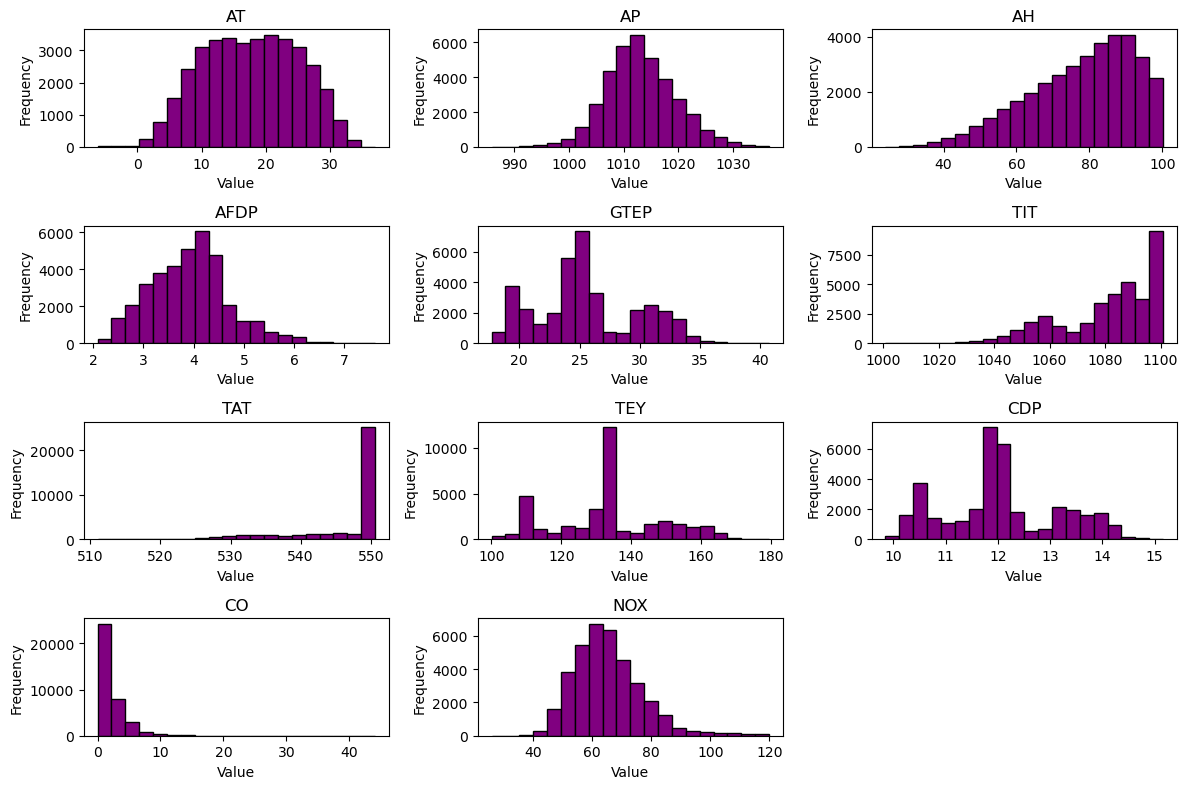

In [11]:
# Plot histograms for each sensor variable

plt.figure(figsize=(12, 8))
for i, var in enumerate(sensor_variables, start=1):
    plt.subplot(4, 3, i)
    plt.hist(data[var], bins=20, color='purple', edgecolor='black')
    plt.title(var)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


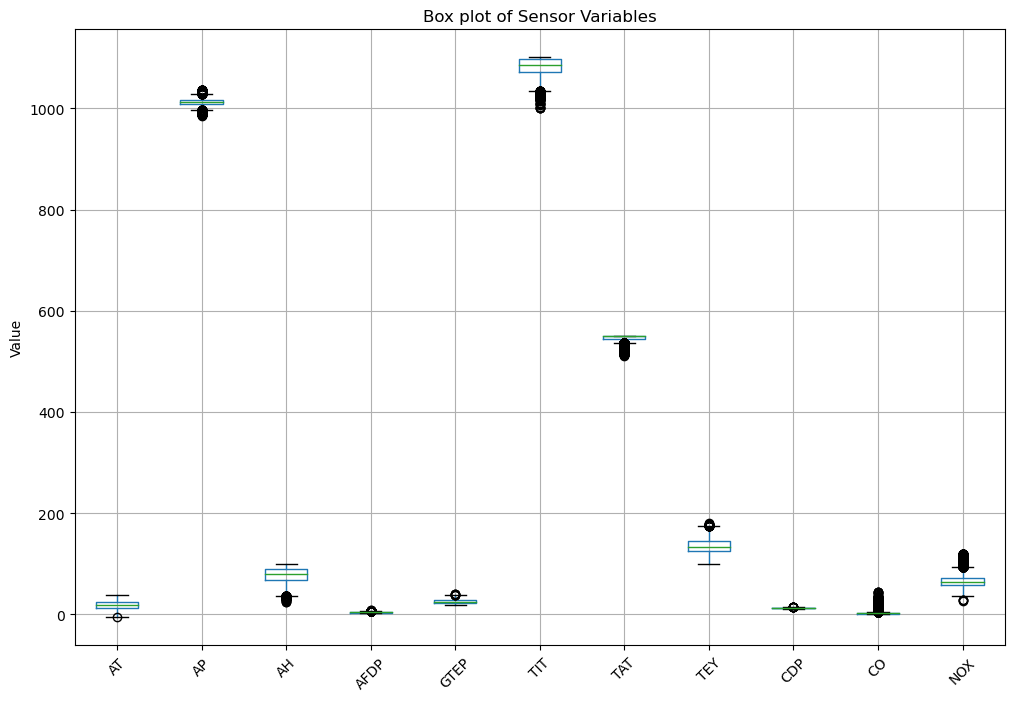

In [12]:
# Plot box plots for each sensor variable
plt.figure(figsize=(12, 8))
data[sensor_variables].boxplot()
plt.title('Box plot of Sensor Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Calculate summary statistics
summary_statistics = data[sensor_variables].describe()
print(summary_statistics)

                 AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634    

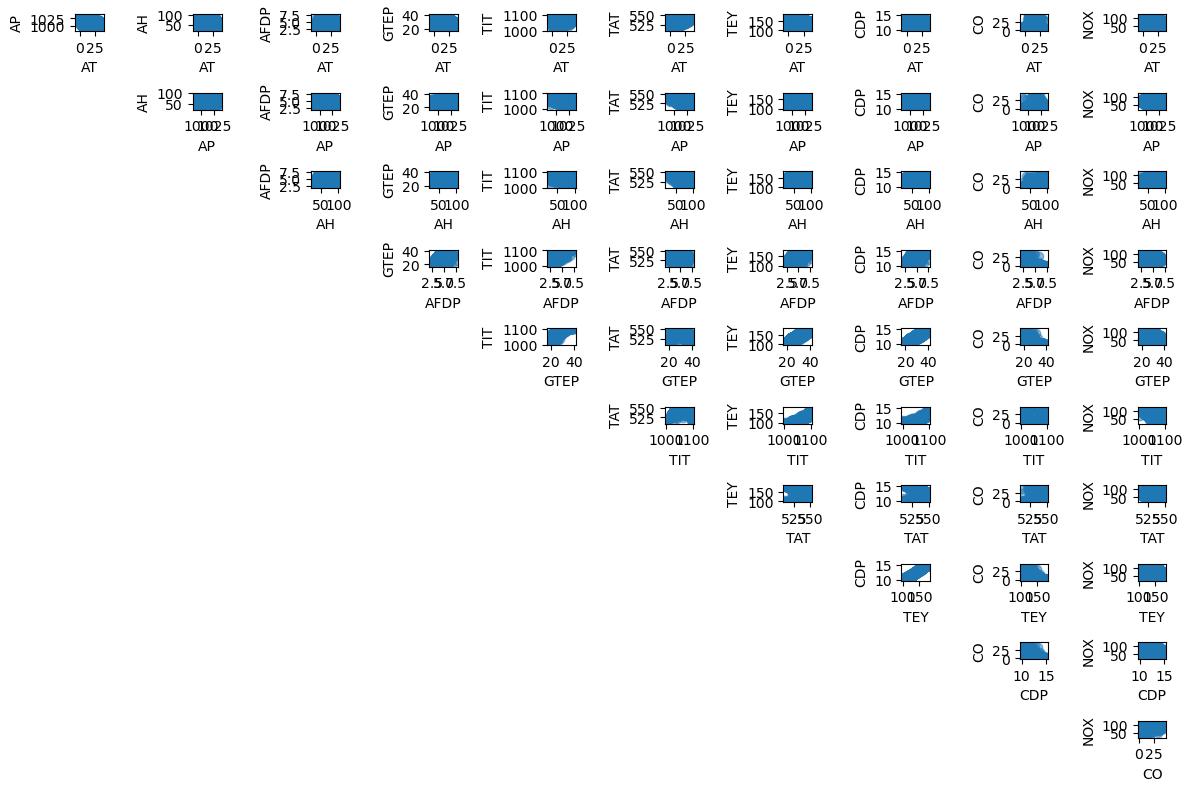

In [14]:
# Plot scatter plots for pairs of sensor variables
plt.figure(figsize=(12, 8))
for i in range(len(sensor_variables)):
    for j in range(i + 1, len(sensor_variables)):
        plt.subplot(len(sensor_variables) - 1, len(sensor_variables) - 1, (i * (len(sensor_variables) - 1)) + j)
        plt.scatter(data[sensor_variables[i]], data[sensor_variables[j]], alpha=0.5)
        plt.xlabel(sensor_variables[i])
        plt.ylabel(sensor_variables[j])

plt.tight_layout()
plt.show()

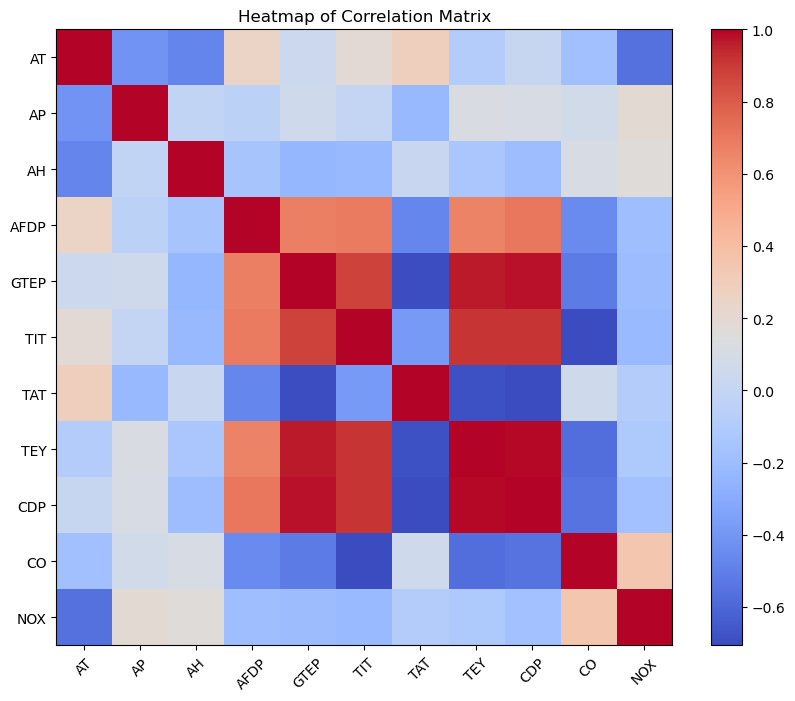

In [15]:
# Plot heatmap of correlation matrix
correlation_matrix = data[sensor_variables].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Correlation Matrix')
plt.xticks(range(len(sensor_variables)), sensor_variables, rotation=45)
plt.yticks(range(len(sensor_variables)), sensor_variables)
plt.show()

### Traning and Testing of The Dataset

#### The following step creates the training using selected model.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
# Load the preprocessed dataset
data = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv')

In [18]:
# Define input and target variables
X = data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']].values
y = data['CO'].values  # 'Target_Variable'

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape input data for LSTM model (assuming a sequence length of 1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [19]:
# Define the LSTM model architecture
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12451 (48.64 KB)
Trainable params: 12451 (48.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Define callbacks to save the model
checkpoint_filepath = "C:/Users/muham/OneDrive/Desktop/lstm_model_checkpoint.h5"
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])

# Save the entire model to a file
saved_model_path = "C:/Users/Muham/OneDrive/Desktop/my_model.keras"
model.save(saved_model_path)

print("Model saved to:", saved_model_path)

Epoch 1/100
735/735 [==============================] - 7s 5ms/step - loss: 5.6419 - mae: 1.4236 - val_loss: 4.6765 - val_mae: 1.4098
Epoch 2/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1331 - mae: 1.4253 - val_loss: 4.6766 - val_mae: 1.4100
Epoch 3/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1323 - mae: 1.4252 - val_loss: 4.6788 - val_mae: 1.4186
Epoch 4/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1320 - mae: 1.4268 - val_loss: 4.6749 - val_mae: 1.3974
Epoch 5/100
735/735 [==============================] - 4s 5ms/step - loss: 5.1330 - mae: 1.4240 - val_loss: 4.6805 - val_mae: 1.4235
Epoch 6/100
735/735 [==============================] - 4s 5ms/step - loss: 5.1332 - mae: 1.4251 - val_loss: 4.6779 - val_mae: 1.4155
Epoch 7/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1341 - mae: 1.4262 - val_loss: 4.6761 - val_mae: 1.4078
Epoch 8/100
735/735 [==============================] - 3s 4ms/step - 

735/735 [==============================] - 3s 4ms/step - loss: 5.1329 - mae: 1.4257 - val_loss: 4.6754 - val_mae: 1.4030
Epoch 63/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1332 - mae: 1.4240 - val_loss: 4.6761 - val_mae: 1.4077
Epoch 64/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1329 - mae: 1.4247 - val_loss: 4.6785 - val_mae: 1.4176
Epoch 65/100
735/735 [==============================] - 4s 5ms/step - loss: 5.1352 - mae: 1.4265 - val_loss: 4.6756 - val_mae: 1.4043
Epoch 66/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1333 - mae: 1.4254 - val_loss: 4.6754 - val_mae: 1.4024
Epoch 67/100
735/735 [==============================] - 3s 4ms/step - loss: 5.1338 - mae: 1.4252 - val_loss: 4.6834 - val_mae: 1.4307
Epoch 68/100
735/735 [==============================] - 4s 5ms/step - loss: 5.1328 - mae: 1.4268 - val_loss: 4.6750 - val_mae: 1.3991
Epoch 69/100
735/735 [==============================] - 4s 5ms/step - loss:

#### The next step is about the optimization of trained model.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
# Load the preprocessed dataset
data = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 2 FILE\preprocessed_data.csv')

In [23]:
# Define input and target variables
X = data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']].values
y = data['CO'].values  #Target variable

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [24]:
# Reshape input data for LSTM model (assuming a sequence length of 1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model architecture with dropout regularization
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(1)
])

In [25]:
# Compile the model with Adam optimizer and customized learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Define callbacks for model checkpointing and early stopping
checkpoint_filepath = "C:/Users/muham/OneDrive/Desktop/lstm_model_checkpoint.h5"
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback, early_stopping_callback])

# Save the entire model to a file
saved_model_path = "C:/Users/Muham/OneDrive/Desktop/my_model.keras"
model.save(saved_model_path)

print("Model saved to:", saved_model_path)

Epoch 1/100
735/735 [==============================] - 6s 5ms/step - loss: 6.4405 - mae: 1.5345 - val_loss: 4.6770 - val_mae: 1.3766
Epoch 2/100
735/735 [==============================] - 3s 4ms/step - loss: 5.2719 - mae: 1.4378 - val_loss: 4.6749 - val_mae: 1.3903
Epoch 3/100
735/735 [==============================] - 3s 4ms/step - loss: 5.2456 - mae: 1.4311 - val_loss: 4.6756 - val_mae: 1.3836
Epoch 4/100
735/735 [==============================] - 3s 4ms/step - loss: 5.2316 - mae: 1.4303 - val_loss: 4.6763 - val_mae: 1.3796
Epoch 5/100
735/735 [==============================] - 3s 4ms/step - loss: 5.2139 - mae: 1.4270 - val_loss: 4.6776 - val_mae: 1.3742
Epoch 6/100
735/735 [==============================] - 3s 4ms/step - loss: 5.2146 - mae: 1.4261 - val_loss: 4.6749 - val_mae: 1.3923
Epoch 7/100
735/735 [==============================] - 3s 4ms/step - loss: 5.2120 - mae: 1.4245 - val_loss: 4.6792 - val_mae: 1.4197
Epoch 8/100
735/735 [==============================] - 3s 4ms/step - 

## Big Data Processing

In [26]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


#### In the following step, we utilized pyspark to create for selected dataset for big data processing.

In [27]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Simple PySpark Example") \
    .getOrCreate()

# Read the CSV file into a Spark DataFrame
df = spark.read.csv("C:/Users/Muham/OneDrive/Desktop/CA 2 FILE/preprocessed_data.csv", header=True, inferSchema=True)

# Show the first few rows of the DataFrame
df.show()



# Stop the SparkSession
spark.stop()

+----------+------+------+------+------+------+------+------+------+------+-------+------+
|Unnamed: 0|    AT|    AP|    AH|  AFDP|  GTEP|   TIT|   TAT|   TEY|   CDP|     CO|   NOX|
+----------+------+------+------+------+------+------+------+------+------+-------+------+
|         1|4.5878|1018.7|83.675|3.5758|23.979|1086.2|549.83|134.67|11.898|0.32663|81.952|
|         2|4.2932|1018.3|84.235|3.5709|23.951|1086.1|550.05|134.67|11.892|0.44784|82.377|
|         3|3.9045|1018.4|84.858|3.5828| 23.99|1086.5|550.19| 135.1|12.042|0.45144|83.776|
|         4|3.7436|1018.3|85.434|3.5808|23.911|1086.5|550.17|135.03| 11.99|0.23107|82.505|
|         5|3.7516|1017.8|85.182|3.5781|23.917|1085.9| 550.0|134.67| 11.91|0.26747|82.028|
|         6|3.8858|1017.7|83.946|3.5824|23.903|1086.0|549.98|134.67|11.868|0.23473|81.748|
|         7|3.6697|1018.0|84.114|3.5804|23.889|1085.9|550.04|134.68|11.877|0.44412|84.592|
|         8|3.5892|1018.2|83.867|3.5777|23.876|1086.0|549.88|134.66|11.893|0.79996|84.193|

In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, max, min, stddev

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Data Analysis with PySpark") \
    .getOrCreate()

# Read the dataset into a DataFrame
data_path = "C:\\Users\\Muham\\OneDrive\\Desktop\\CA 2 FILE\\preprocessed_data.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Show the schema of the DataFrame
df.printSchema()

# Display summary statistics for numerical columns
df.describe().show()


# Stop the SparkSession
spark.stop()


root
 |-- Unnamed: 0: integer (nullable = true)
 |-- AT: double (nullable = true)
 |-- AP: double (nullable = true)
 |-- AH: double (nullable = true)
 |-- AFDP: double (nullable = true)
 |-- GTEP: double (nullable = true)
 |-- TIT: double (nullable = true)
 |-- TAT: double (nullable = true)
 |-- TEY: double (nullable = true)
 |-- CDP: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- NOX: double (nullable = true)

+-------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|       Unnamed: 0|                AT|               AP|                AH|              AFDP|             GTEP|               TIT|              TAT|               TEY|               CDP|                CO|               NOX|
+-------+-----------------+------------------+-----------------+------------------+-----------------